# Reading and Plotting Processed CSV Data

If you do not already have __pyEcholab__ installed, use the following pip command in the terminal to install it:
```
pip install git+https://github.com/CI-CMG/pyEcholab.git
```

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

import s3fs
import boto3, botocore
from botocore import UNSIGNED
from botocore.client import Config

s3 = boto3.resource(
    's3',
    aws_access_key_id='',
    aws_secret_access_key='',
    config=Config(signature_version=UNSIGNED)
)

BUCKET = 'ncei-wcsd-archive'

The column header for the CSV files includes all the following:

1. Ping_index
1. Distance_gps
1. Distance_vl
1. Ping_date
1. Ping_time
1. Ping_milliseconds
1. Latitude
1. Longitude
1. Depth_start
1. Depth_stop
1. Range_start
1. Range_stop
1. Sample_count
1. Data --> 1000 data samples

In [2]:
file = ("https://ncei-wcsd-archive.s3-us-west-2.amazonaws.com"
        "/data/processed/SH1305/multifrequency/"
        "SaKe2013-D20130523-T080854_to_SaKe2013-D20130523-T085643.csv")

In [3]:
df18 = pd.read_csv(file, header=None, na_values=['-9.9e+37',' -9.9e+37'], skiprows=1)

print('type:', type(df18))

type: <class 'pandas.core.frame.DataFrame'>


In [4]:
dd18 = df18.iloc[:, 13:1013].to_numpy()

print('type:', type(dd18))

type: <class 'numpy.ndarray'>


In [5]:
print(dd18.shape)

(2548, 1000)


The following color table is used for multifrequency data.

In [6]:
ca = np.array([
    (0, 255, 255, 255), #nan
    (1, 187, 187, 187), #1
    (3, 0, 0, 255), #3
    (4, 128, 128, 255), #4
    (7, 255, 0, 0), #7
    (8, 255, 128, 128), #8
    (10, 219, 50, 219), #10
    (11, 255, 94, 255), #11
    (13, 255, 255, 0), #13
    (14, 255, 255, 128), #14
    (16, 0, 255, 0), #16
    (17, 128, 255, 128), #17
    (20, 255, 120, 0), #20
    (21, 255, 156, 66), #21
    (23, 125, 0, 125), #23
    (24, 183, 0, 183), #24
    (29, 81, 81, 81), #29
    (30, 116, 109, 112), #30
    (32, 0, 0, 106), #32
    (33, 0, 0, 149), #33
    (36, 121, 0, 0), #36
    (37, 185, 0, 0), #37
    (39, 45, 0, 45), #39
    (40, 74, 0, 74), #40
    (42, 151, 151, 0), #42
    (43, 206, 206, 0), #43
    (45, 0, 66, 0), #45
    (46, 0, 138, 0), #46
    (49, 128, 64, 0), #49
    (50, 215, 107, 0), #50
    (52, 0, 230, 230), #52
    (53, 185, 255, 255)]) #53

The color table above specifies 53 different colors. Those colors are indexed by the data object below.

Here we rotate the data and replace indices that are NAN.

In [7]:
data = np.rot90(dd18[:,:500], k=3)
data = np.nan_to_num(data)
print(data.shape)

(500, 2548)


<IPython.core.display.Javascript object>


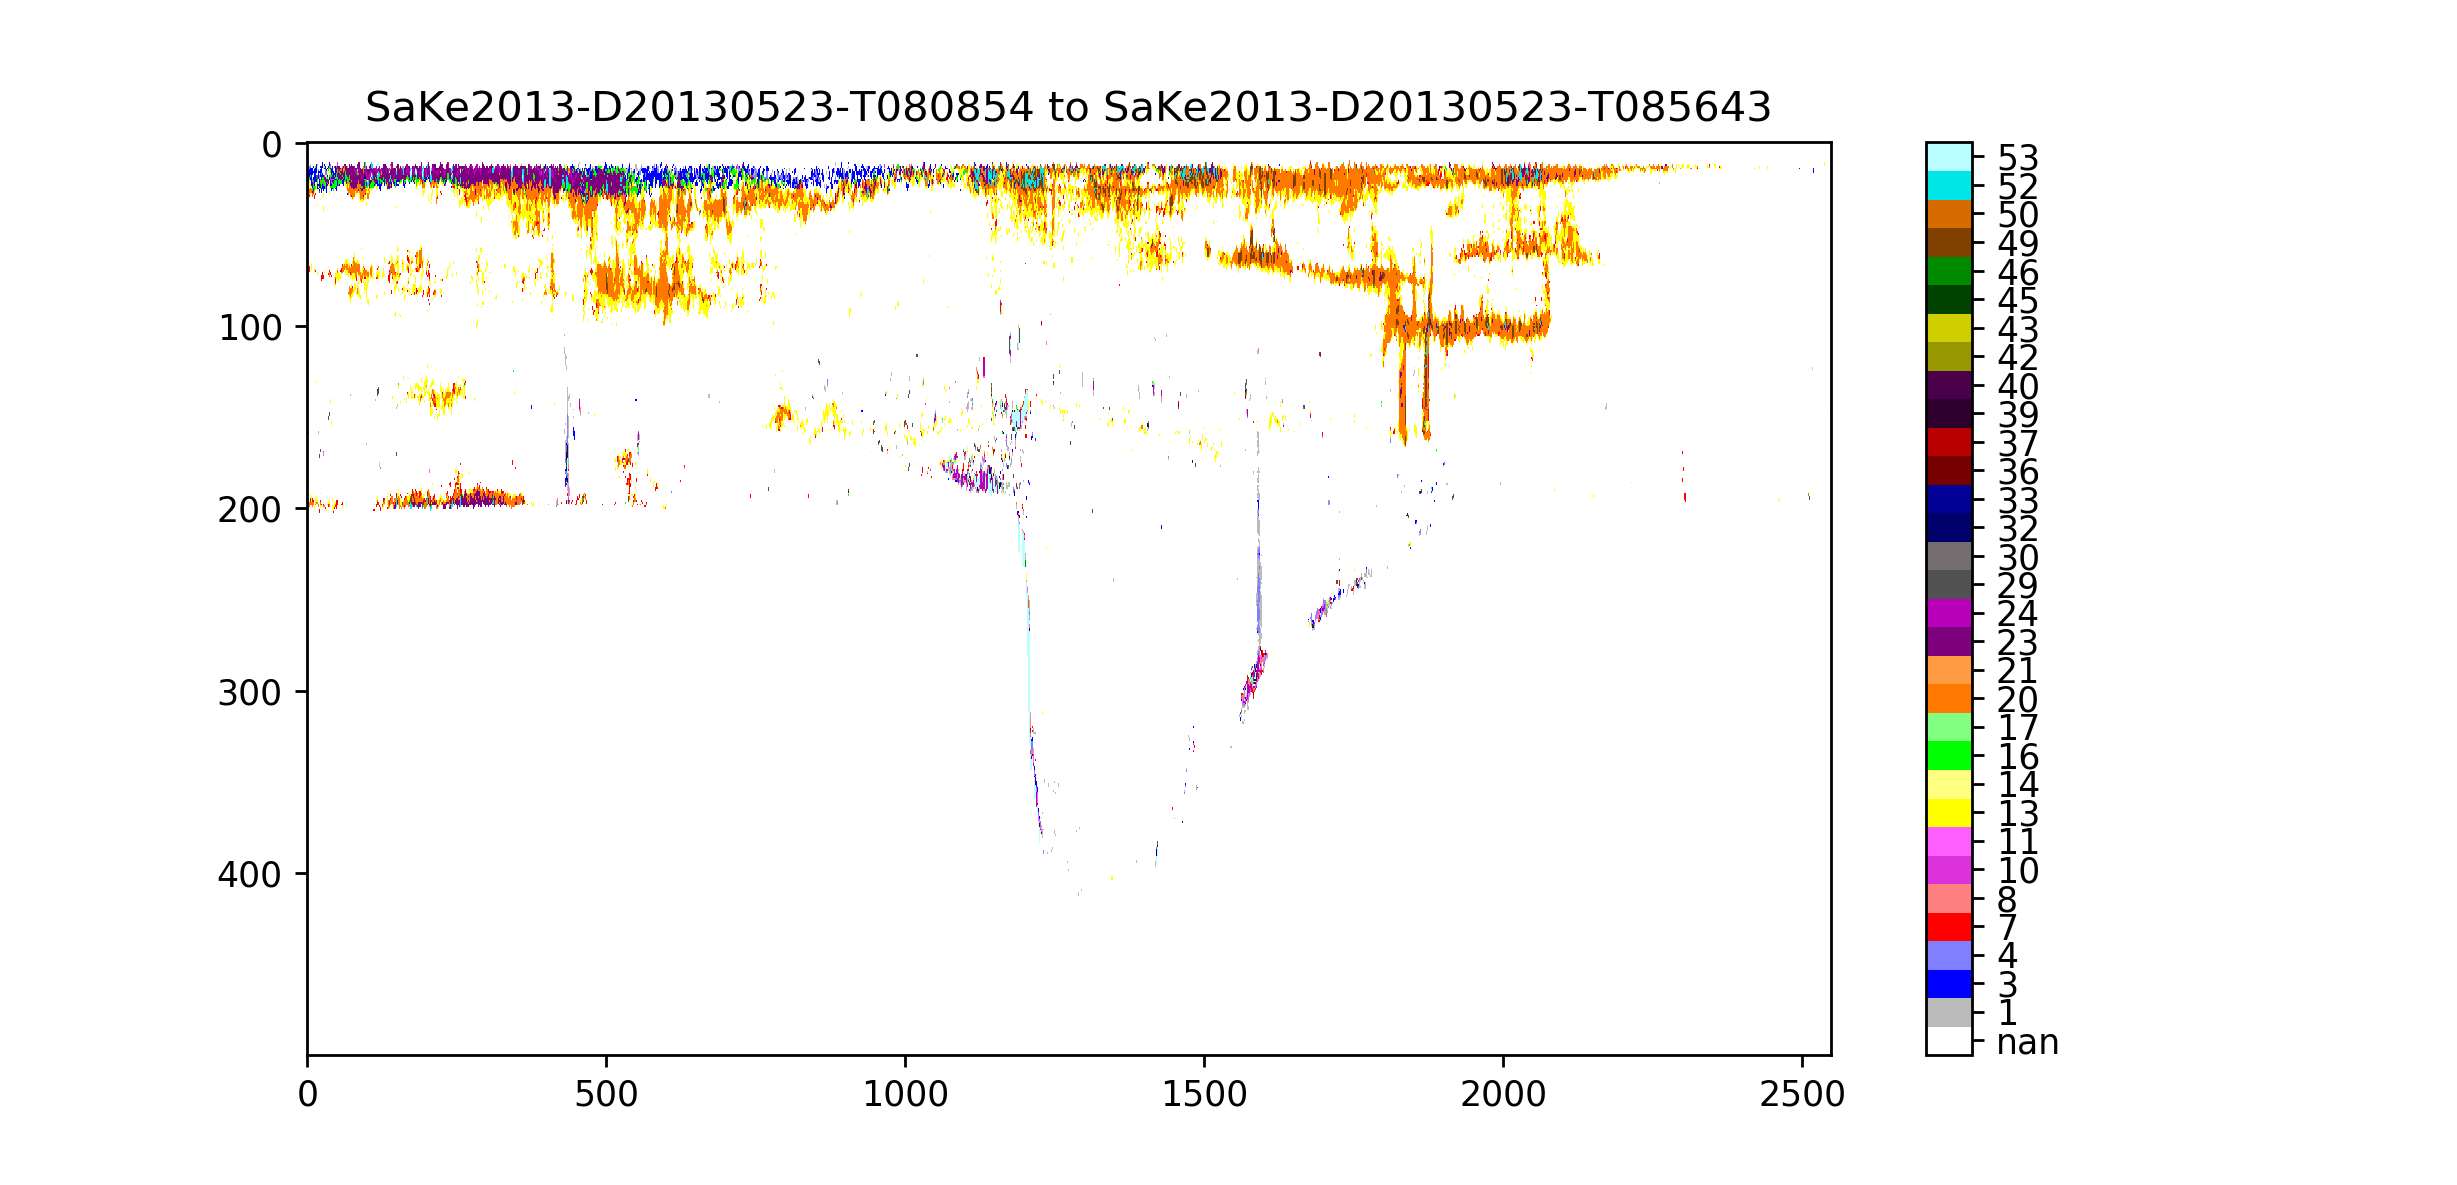

In [8]:
u, ind = np.unique(data, return_inverse=True)
b = ind.reshape((data.shape))
colors = ca[ca[:,0].argsort()][:,1:]/255.
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(np.arange(len(ca)+1)-0.5, len(ca))

plt.imshow(b, cmap=cmap, norm=norm, aspect="auto")
cb = plt.colorbar(ticks=np.arange(len(ca)))
labels = [i for i in np.unique(ca[:, 0])]; labels[0] = 'nan'
cb.ax.set_yticklabels(labels)
plt.title("SaKe2013-D20130523-T080854 to SaKe2013-D20130523-T085643")

plt.show()